# Finding the best chocolate bars

#### Welcome to my project I hope you will enjoy the sequence and the logic of the analysis, please do not hesitate to comment to let me enhance the analysis.
#### Thanks & Enjoy 😁 


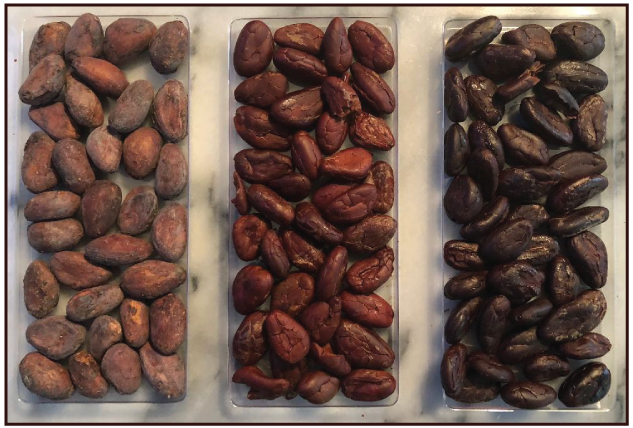


## 💪 Challenge Summary Of findings:

## 1. What is the average rating by country of origin?
## 2. How many bars were reviewed for each of those countries?
## 3. Create plots to visualize findings for questions 1 and 2.
## 4. Is the cacao bean's origin an indicator of quality? 

    * many of the origins rated less than 50 times, and it is very missleading because in the first graph for this question you can see that china has the highest average rating, but it actualy rated one time only !! 
    
    * so we may need to deciede to slice the data to include the origins that only had 50 reviews or higher.
 
### after that you can find 
#### 1. Venezuela rated 246 times with average 3.239 & highest number of rate "3" = 58
#### 2. Peru rated 231 times with average of 3.228
#### 3. Dominican Republic rated 220 times wtih average 3.219 & highest number of rate "3.25" = 48 & highest number of rate "3.75" = 40
#### 4. Ecuador rated 201 times with average of 3.213 & highest number of rate "3.5" = 54
    
the cacao bean's origin is not always an indicator of quality. as the relation between the bean_origin and avg rating for all origins that reviewed more than 50 times are between 3.28 and 3.08

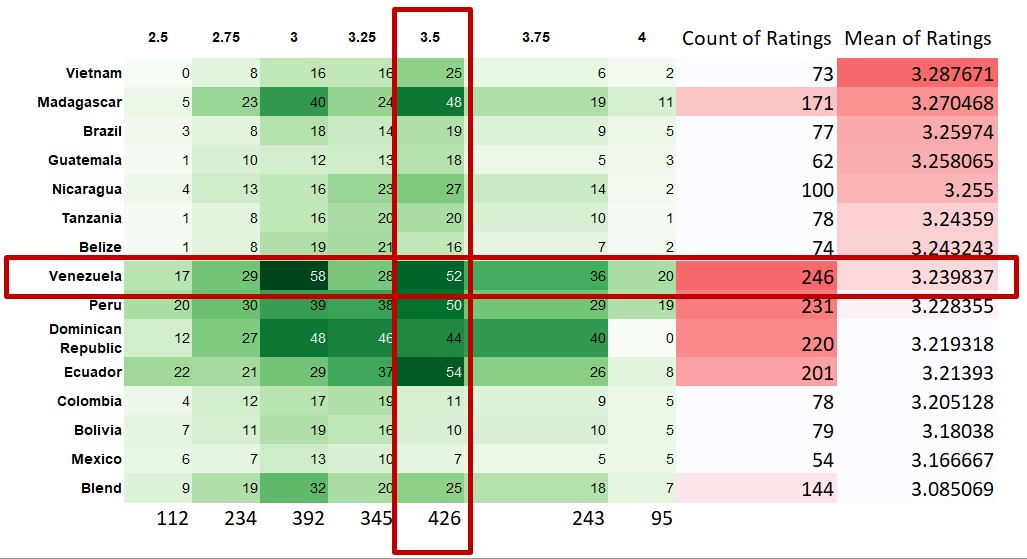






## 5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

    * after investingation we can determind that 70% cocoa content is the highest rated bar with 783 rates and most of them are above 3.25
    * the increas of cocoa content percent in the chocolate bar did not garanty the quality of chocolate.


## 6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

    * average rating of hocolate bars with Lecithin:  3.1628
    * average rating of hocolate bars without Lecithin:  3.2371
    *#### reviews and average ratings for chocolate bars without Lecithin are higher than with Lecithin.






## ⌛️ Time is ticking. Good luck!

In [3]:
# Importing the pandas module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the data
df = pd.read_csv('chocolate_bars.csv')

# Take a look at the first datapoints
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


there are 87 rows contain Null values in "Ingredients" & "num_ingredients" 
* we can creat num_ingredients column if we have vailable data in Ingredients column, but the situation here we do not have both so we will drop them.

## Cleaning & Preparation

In [5]:
#creating new df to start the cleaning process
clean_df=df.copy()

In [6]:
# drop na values
clean_df.dropna( inplace=True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2443 non-null   int64  
 1   manufacturer      2443 non-null   object 
 2   company_location  2443 non-null   object 
 3   year_reviewed     2443 non-null   int64  
 4   bean_origin       2443 non-null   object 
 5   bar_name          2443 non-null   object 
 6   cocoa_percent     2443 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2443 non-null   object 
 10  rating            2443 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 229.0+ KB


In [7]:
#creating separate column for each ingredients
clean_df["B"] = clean_df["ingredients"].map(lambda x: 1 if "B" in x else 0)
clean_df["S"] = clean_df["ingredients"].map(lambda x: 1 if "S" in x else 0)
clean_df["C"] = clean_df["ingredients"].map(lambda x: 1 if "C" in x else 0)
clean_df["V"] = clean_df["ingredients"].map(lambda x: 1 if "V" in x else 0)
clean_df["L"] = clean_df["ingredients"].map(lambda x: 1 if "L" in x else 0)
clean_df["Sa"] = clean_df["ingredients"].map(lambda x: 1 if "Sa" in x else 0)
clean_df.head(10)

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,B,S,C,V,L,Sa
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,1,1,1,0,0,0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,1,1,1,0,0,0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,1,1,1,0,0,0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,1,1,1,0,0,0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,1,1,1,0,0,0
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,3.0,"B,S,C","mildly bitter, basic cocoa, fatty",3.25,1,1,1,0,0,0
6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,3.0,"B,S,C","milk brownie, macadamia,chewy",3.50,1,1,1,0,0,0
7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50,1,1,1,0,1,0
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75,1,1,1,0,1,0
9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75,1,1,1,0,1,0


In [8]:
clean_df[["cocoa_percent","num_ingredients","rating"]].describe()

,cocoa_percent,num_ingredients,rating
count,2443.000000,2443.000000,2443.00000
mean,71.496725,3.041343,3.21009
std,5.156974,0.913728,0.42837
min,42.000000,1.000000,1.00000
25%,70.000000,2.000000,3.00000
50%,70.000000,3.000000,3.25000
75%,74.000000,4.000000,3.50000
max,100.000000,6.000000,4.00000


# 1.1 What is the average rating by country of origin?
### <span style="color:blue">Please scroll down and do not trust the insight from the first time 🤷‍♀️ </span>


In [9]:
# group the data by "bean_origin" and getting the average rating for them.
avg_rating_byorigin=clean_df.groupby("bean_origin")["rating"].mean().sort_values(ascending=False)
avg_rating_byorigin

bean_origin
China                    3.500000
Sao Tome & Principe      3.500000
Solomon Islands          3.450000
Congo                    3.318182
Thailand                 3.300000
                           ...   
Principe                 2.750000
Sierra Leone             2.750000
St.Vincent-Grenadines    2.750000
Martinique               2.750000
Puerto Rico              2.714286
Name: rating, Length: 62, dtype: float64

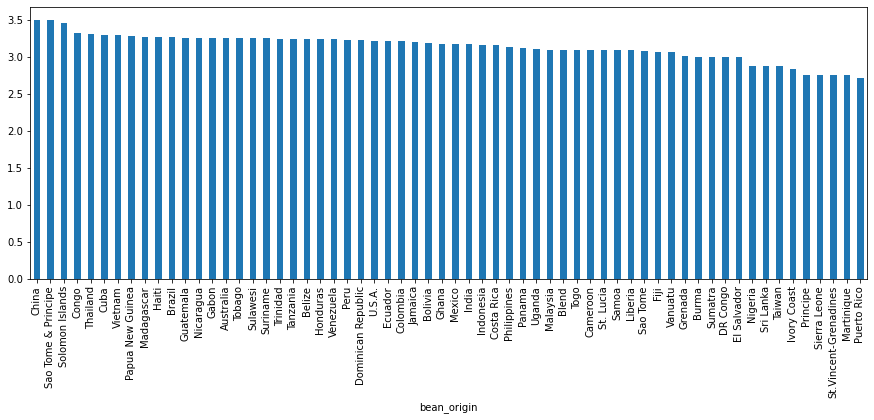

In [10]:
fig,g=plt.subplots(figsize=(15,5))
avg_rating_byorigin.plot(kind="bar");


so the the answer of the first question is 
1. first place shares between "China" , "Sao Tome & Principe" by 3.5
2. "Puerto Rico" in the last place with 2.714

# 2. How many bars were reviewed for each of those countries?

In [11]:
count_of_reviews_bycountry=clean_df.groupby("bean_origin")["id"].count().sort_values(ascending=False)
count_of_reviews_bycountry

bean_origin
Venezuela                246
Peru                     231
Dominican Republic       220
Ecuador                  201
Madagascar               171
                        ... 
China                      1
St.Vincent-Grenadines      1
DR Congo                   1
Principe                   1
Martinique                 1
Name: id, Length: 62, dtype: int64

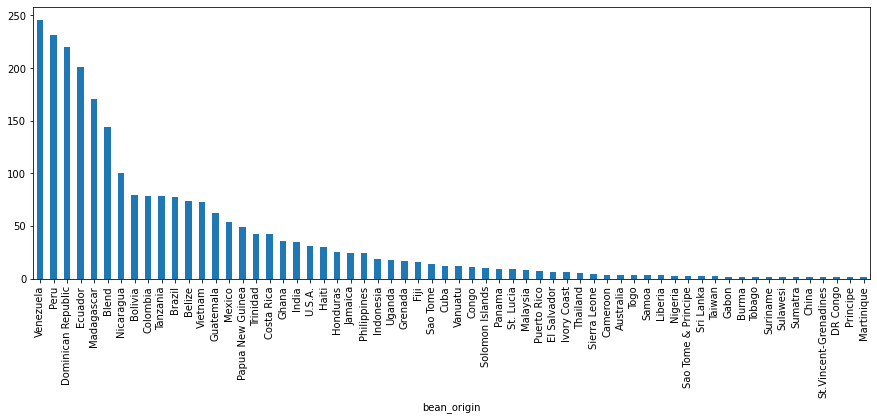

In [12]:
fig,g=plt.subplots(figsize=(15,5))
count_of_reviews_bycountry.plot(kind="bar");

# <span style="color:red">oops !!  </span>
from this step we can notice that we can not make our decision depend on the first graph only.
becouse for examble china has only one vote!! 
### Starting from here we will filter the dataset to contain the origins that have more than 50 reviews

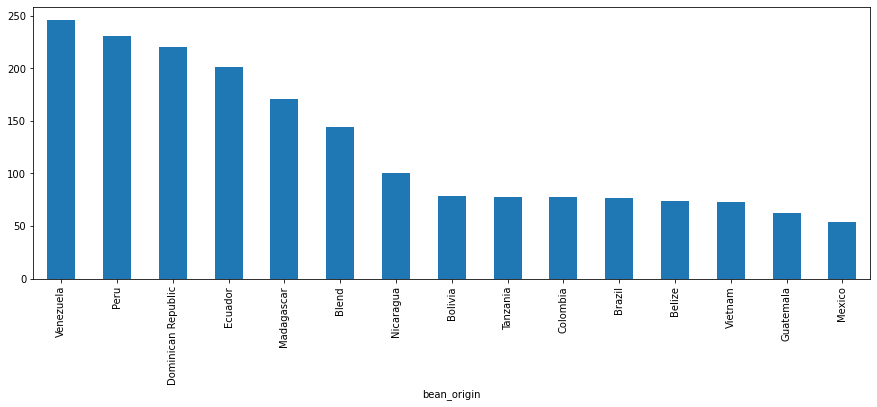

In [13]:
# we will proceed to anlayze the data with more than 50 reviews
fig,g=plt.subplots(figsize=(15,5))
more_than_50_ =  count_of_reviews_bycountry[count_of_reviews_bycountry >50]
more_than_50_.sort_values(ascending=False).plot(kind="bar");

In [14]:
# convert to list to use it to slice the original dataframe
more_than_50_list=more_than_50_.index.tolist()

# using the list to slice the dataframe to contain only the "bean_origin" that reviewed more than 50 times
clean_df=clean_df[clean_df["bean_origin"].isin(more_than_50_list)]  
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 2529
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1888 non-null   int64  
 1   manufacturer      1888 non-null   object 
 2   company_location  1888 non-null   object 
 3   year_reviewed     1888 non-null   int64  
 4   bean_origin       1888 non-null   object 
 5   bar_name          1888 non-null   object 
 6   cocoa_percent     1888 non-null   float64
 7   num_ingredients   1888 non-null   float64
 8   ingredients       1888 non-null   object 
 9   review            1888 non-null   object 
 10  rating            1888 non-null   float64
 11  B                 1888 non-null   int64  
 12  S                 1888 non-null   int64  
 13  C                 1888 non-null   int64  
 14  V                 1888 non-null   int64  
 15  L                 1888 non-null   int64  
 16  Sa                1888 non-null   int64  


# 1.2 What is the average rating by country of origin? <span style="color:red"> modified </span> 😊

In [15]:
avg_rating_byorigin=clean_df.groupby("bean_origin")["rating"].mean().sort_values(ascending=False)
avg_rating_byorigin

bean_origin
Vietnam               3.287671
Madagascar            3.270468
Brazil                3.259740
Guatemala             3.258065
Nicaragua             3.255000
Tanzania              3.243590
Belize                3.243243
Venezuela             3.239837
Peru                  3.228355
Dominican Republic    3.219318
Ecuador               3.213930
Colombia              3.205128
Bolivia               3.180380
Mexico                3.166667
Blend                 3.085069
Name: rating, dtype: float64

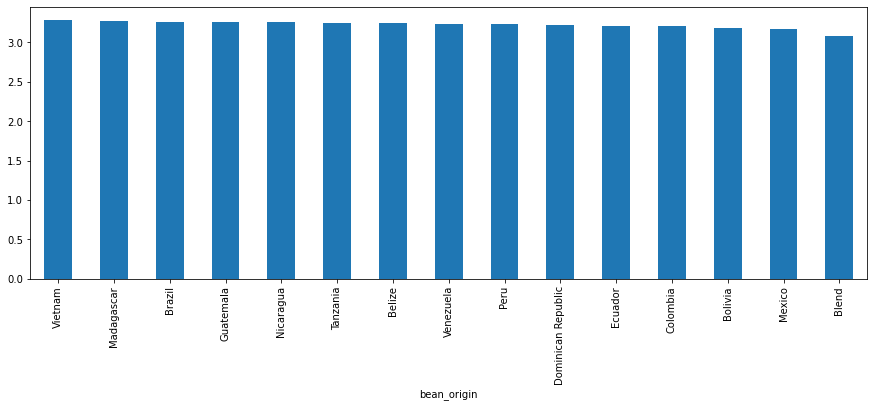

In [16]:
fig,g=plt.subplots(figsize=(15,5))
avg_rating_byorigin.plot(kind="bar");

we can somehow trust the above graph but to be sure we need to make a table to see the count of ratings per each origin.


a pivot table contains 
* bean_origin
* number of reviews per each rating.

In [17]:
# Creating a copy of rating column to be able to use it two times in the same pivot table.
clean_df["new_rating"]=clean_df["rating"]

# Creating a pivot table 
a=pd.pivot_table(data=clean_df,index="bean_origin",columns=["rating"],
               values=["new_rating"],aggfunc=["count"],fill_value=0)
a.style.background_gradient(cmap="Greens",axis=None)

In [18]:
# table to show the number of reviews and the average ratings better 
clean_df.groupby(["bean_origin"])["rating"].agg(["count","mean"]).style.background_gradient(cmap="Greens",axis=None)

,count,mean
bean_origin,,
Belize,74,3.243243
Blend,144,3.085069
Bolivia,79,3.180380
Brazil,77,3.259740
Colombia,78,3.205128
Dominican Republic,220,3.219318
Ecuador,201,3.213930
Guatemala,62,3.258065
Madagascar,171,3.270468


C:\Users\sesa536669\New folder\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sesa536669\New folder\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


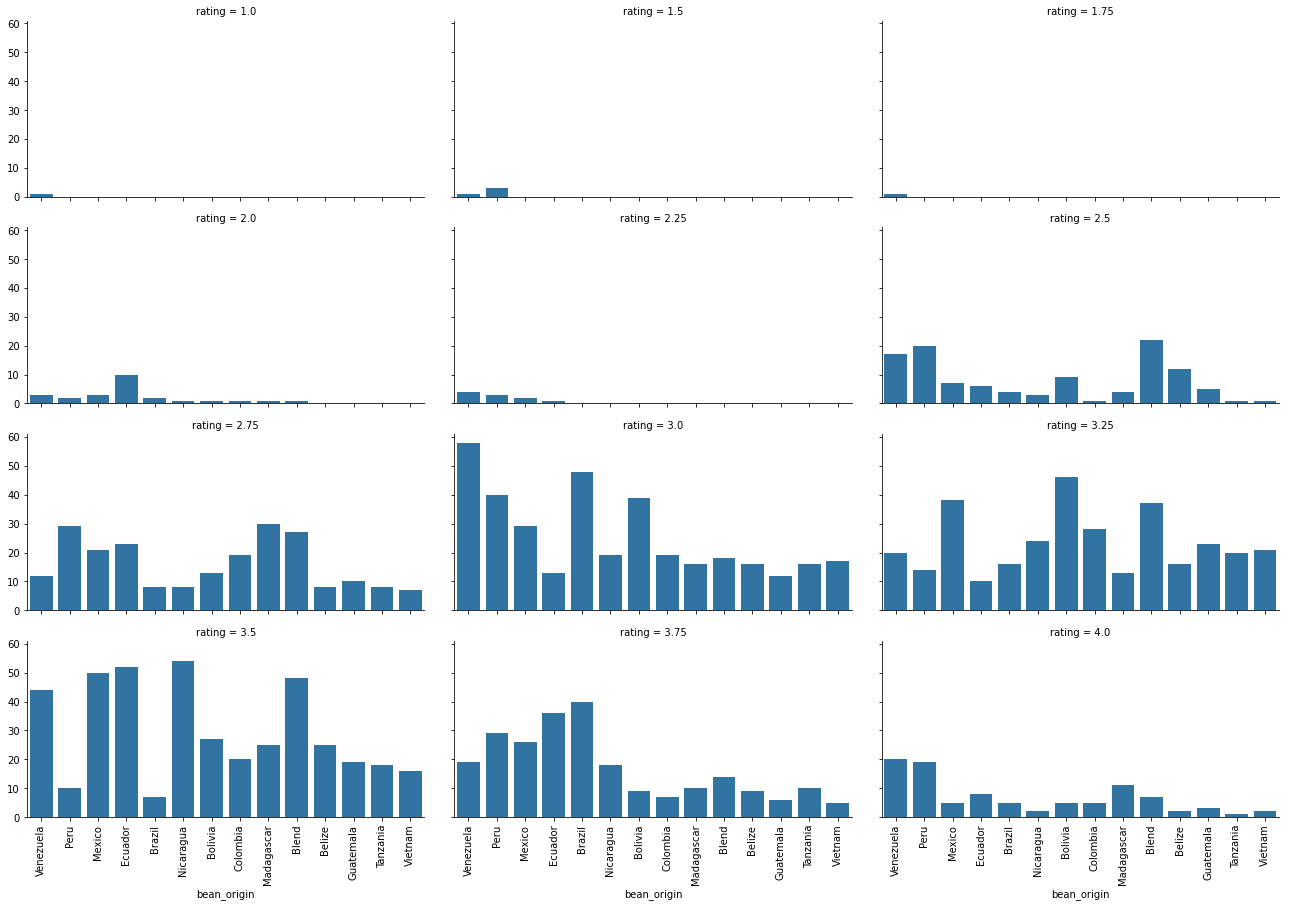

In [19]:

g = sns.FacetGrid(clean_df, col="rating",col_wrap=3,size=3, aspect=2)
g.map(sns.countplot, "bean_origin")
g.set_xticklabels( rotation=90)

g.add_legend();

In [20]:
most_rating_for_each_origin=clean_df.groupby(["bean_origin"])["rating"].agg([pd.Series.mode])  
most_rating_for_each_origin

,mode
bean_origin,
Belize,3.25
Blend,3
Bolivia,3
Brazil,3.5
Colombia,3.25
Dominican Republic,3
Ecuador,3.5
Guatemala,3.5
Madagascar,3.5


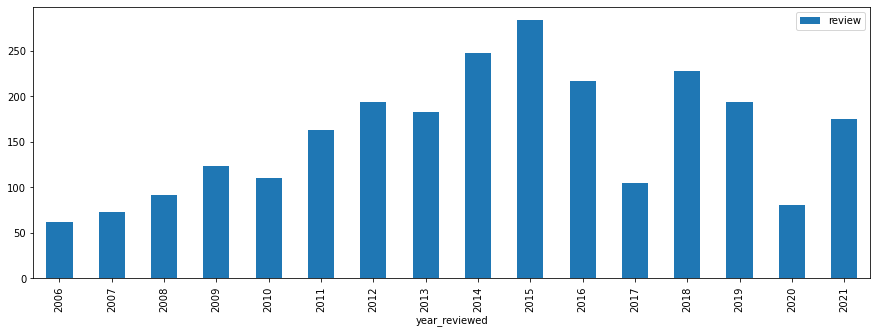

In [21]:
graph=df.groupby('year_reviewed')[['review']].count()
graph.plot(kind="bar",figsize=(15,5));


# 5.1 How does cocoa content relate to rating? 
# 5.2 What is the average cocoa content for bars with higher ratings (above 3.5)?

In [22]:
clean_df.groupby("cocoa_percent")["rating"].agg(["count","min","max","mean"])

,count,min,max,mean
cocoa_percent,,,,
46.0,1,2.75,2.75,2.750000
50.0,1,3.75,3.75,3.750000
53.0,1,2.00,2.00,2.000000
55.0,11,2.50,3.50,2.886364
56.0,2,3.25,3.25,3.250000
58.0,6,2.50,3.50,3.166667
60.0,36,2.00,4.00,3.006944
60.5,1,2.75,2.75,2.750000
61.0,6,2.50,3.50,3.041667


* from the first sight 50% content has the highest average rating and the highest min rating with 3.75
* however Accourding to this table we can not determine the relation between cocoa perentage and the rating due to the number of rating for each percent so we will analyze the percent that has more than 10 reviews 

In [23]:
percent_df = clean_df.cocoa_percent.value_counts().rename_axis('percent').reset_index(name='counts')
more_than_11=percent_df[percent_df["counts"]>10]


more_than_11_list=more_than_11["percent"].values.tolist()
                  

perent_new_df=clean_df[clean_df["cocoa_percent"].isin(more_than_11_list)]  


perent_new_df.groupby("cocoa_percent")["rating"].agg(["count","min","max","mean"]).style.background_gradient(cmap="Greens",axis=None)


,count,min,max,mean
cocoa_percent,,,,
55.0,11,2.500000,3.500000,2.886364
60.0,36,2.000000,4.000000,3.006944
62.0,14,2.000000,3.750000,2.946429
64.0,21,2.750000,4.000000,3.261905
65.0,59,1.500000,3.750000,3.233051
66.0,19,2.500000,3.750000,3.407895
67.0,24,2.750000,4.000000,3.385417
68.0,49,2.000000,4.000000,3.321429
70.0,783,1.500000,4.000000,3.306833


In [24]:
m=pd.pivot_table(data=perent_new_df,index="cocoa_percent",columns=["rating"],
               values=["new_rating"],aggfunc=["count"],fill_value=0,margins=True)
m.style.background_gradient(cmap="Greens",axis=None)

In [25]:
y=pd.pivot_table(data=perent_new_df,index="cocoa_percent",columns=["rating"],
               values=["new_rating"],aggfunc=["count"],fill_value=0)

y.style.background_gradient(cmap="Greens",axis=None)

* from the above pivot table we can determind that 70% cocoa content is the highest rated bar with 783 rates and most of them are above 3.25
* the increas of cocoa content percent in the chocolate bar did not garanty the quality of chocolate.

# 6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

In [26]:
# Creating column contain 1 if the ingredients contain the Lecithin and 0 if not
clean_df["L"] = clean_df["ingredients"].map(lambda x: 1 if "L" in x else 0)


#chocolate bars with Lecithin
lecithin_df=clean_df[clean_df["L"]==1]
bars_with_Lecithin=lecithin_df["rating"].mean()

#chocolate bars without Lecithin
without_lecithin_df=clean_df[clean_df["L"]!=1]
bars_without_Lecithin=without_lecithin_df["rating"].mean()

print("average rating of hocolate bars with Lecithin: ",bars_with_Lecithin)
print("average rating of hocolate bars without Lecithin: ",bars_without_Lecithin)


average rating of hocolate bars with Lecithin:  3.162837837837838
average rating of hocolate bars without Lecithin:  3.2371541501976284


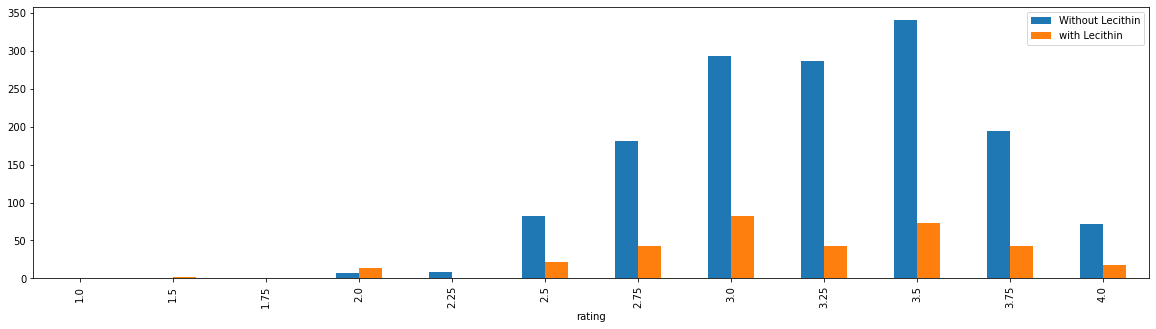

In [27]:
# making a pivot table for Lecithin and count of rating
x=pd.pivot_table(data=perent_new_df,index="rating",columns=["L"],
               values=["new_rating"],aggfunc=["count"],fill_value=0)

# Visualize the result
x.plot(kind="bar",figsize=[20,5],legend=False)
plt.legend(('Without Lecithin','with Lecithin'))

reviews and average ratings for chocolate bars without Lecithin are higher than with Lecithin.